# # <div style="text-align:center"> Τεχνικές Εξόρυξης Δεδομένων: 1η Άσκηση  </div>

### <div style="text-align:center">  Παναγιώτοπουλος Γεώργιος **1115201700113** </div>

## 1. Προεπεξεργασία/Καθάρισμα:
Ελέγξτε αν υπάρχουν τιμές που λείπουν στα δεδομένα και
χειριστείτε τις ανάλογα, μετατρέψτε στήλες που αφορούν ημερομηνίες σε DateTime
objects και ελέγξτε αν υπάρχουν και κάποια χαρακτηριστικά dtype: object τα οποία
μπορείτε να κωδικοποιήσετε/μετατρέψετε σε αριθμητικές τιμές (5%).

In [328]:
import pandas as pd
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
import sklearn 

print(pd.read_csv('marketing_campaign.csv'))

     ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse
0     5524\t1957\tGraduation\tSingle\t58138\t0\t0\t0...                                                                                                                                                                                                                                                                                                                                                  
1     2174\t1954\tGraduation\tSingle\t46344\t1\t1\t0...                                                                                                                                                             

In [329]:
#Data is seperated by tabs
data = pd.read_csv('marketing_campaign.csv',sep='\t')
column_names = list(data.columns)

In [330]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Βλέπουμε οτι το πεδίο income περιέχει ```24``` NULL τιμες. Μικρό ποσοστό, επομένως θα μπορούσαμε να τις γεμήσουμε με τον μέσο όρο. 

In [331]:
income_median = data['Income'].median()
data['Income'].fillna(income_median, inplace=True)

In [332]:
income_null_rows = data['Income'].isnull()
for row in income_null_rows:
    if row == True:
        print("There are still NULL rows!\n")

Η λύση μας δούλεψε. Πλέον δεν έχουμε καθόλου NULL τιμες. <br>
Ας δούμε και ποιο column θα άξιζε να μετατρέψουμε σε DateTime.

In [333]:
data.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [334]:
data['Dt_Customer'].dtype

dtype('O')

Βλέπουμε ότι αν και το format του Dt_Customer field, μοιάζει πάρα πολύ με DateTime, δεν είναι. <br>
Συνεπώς ας το μετατρέψουμε:

In [335]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'],format='%d-%m-%Y')
print(data['Dt_Customer'])

0      2012-09-04
1      2014-03-08
2      2013-08-21
3      2014-02-10
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-06-10
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]


In [336]:
#No reason for them to be occupying int64 space
data['AcceptedCmp1'] =  data['AcceptedCmp1'].astype(bool)
data['AcceptedCmp2'] =  data['AcceptedCmp2'].astype(bool)
data['AcceptedCmp3'] =  data['AcceptedCmp3'].astype(bool)
data['AcceptedCmp4'] =  data['AcceptedCmp4'].astype(bool)
data['AcceptedCmp5'] =  data['AcceptedCmp5'].astype(bool)
data['Response'] =  data['Response'].astype(bool)

## 2. 
Εκτυπώστε τις μοναδικές τιμές στα κατηγορικά χαρακτηριστικά Marital_Status και
Education για να αποκτήσετε μια πιο σαφή εικόνα των δεδομένων. Αλλάξτε τις τιμές
[Alone,Absurd,YOLO] των Marital_Status με την τιμή ‘Single’. Χρησιμοποιήστε όποιο
τύπο γραφήματος θέλετε για να παρουσιάσετε το πλήθος των τιμών σε κάθε κατηγορία.

In [337]:
unique_values_ma = data['Marital_Status'].unique()
unique_values_ed = data['Education'].unique()
print(unique_values_ma,"\n",unique_values_ed)

['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO'] 
 ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']


In [338]:
replace_dict = {'Alone': 'Single', 'Absurd': 'Single', 'YOLO': 'Single'}
data['Marital_Status'] = data['Marital_Status'].replace(replace_dict)
unique_values_ma = data['Marital_Status'].unique()
print(unique_values_ma)

['Single' 'Together' 'Married' 'Divorced' 'Widow']


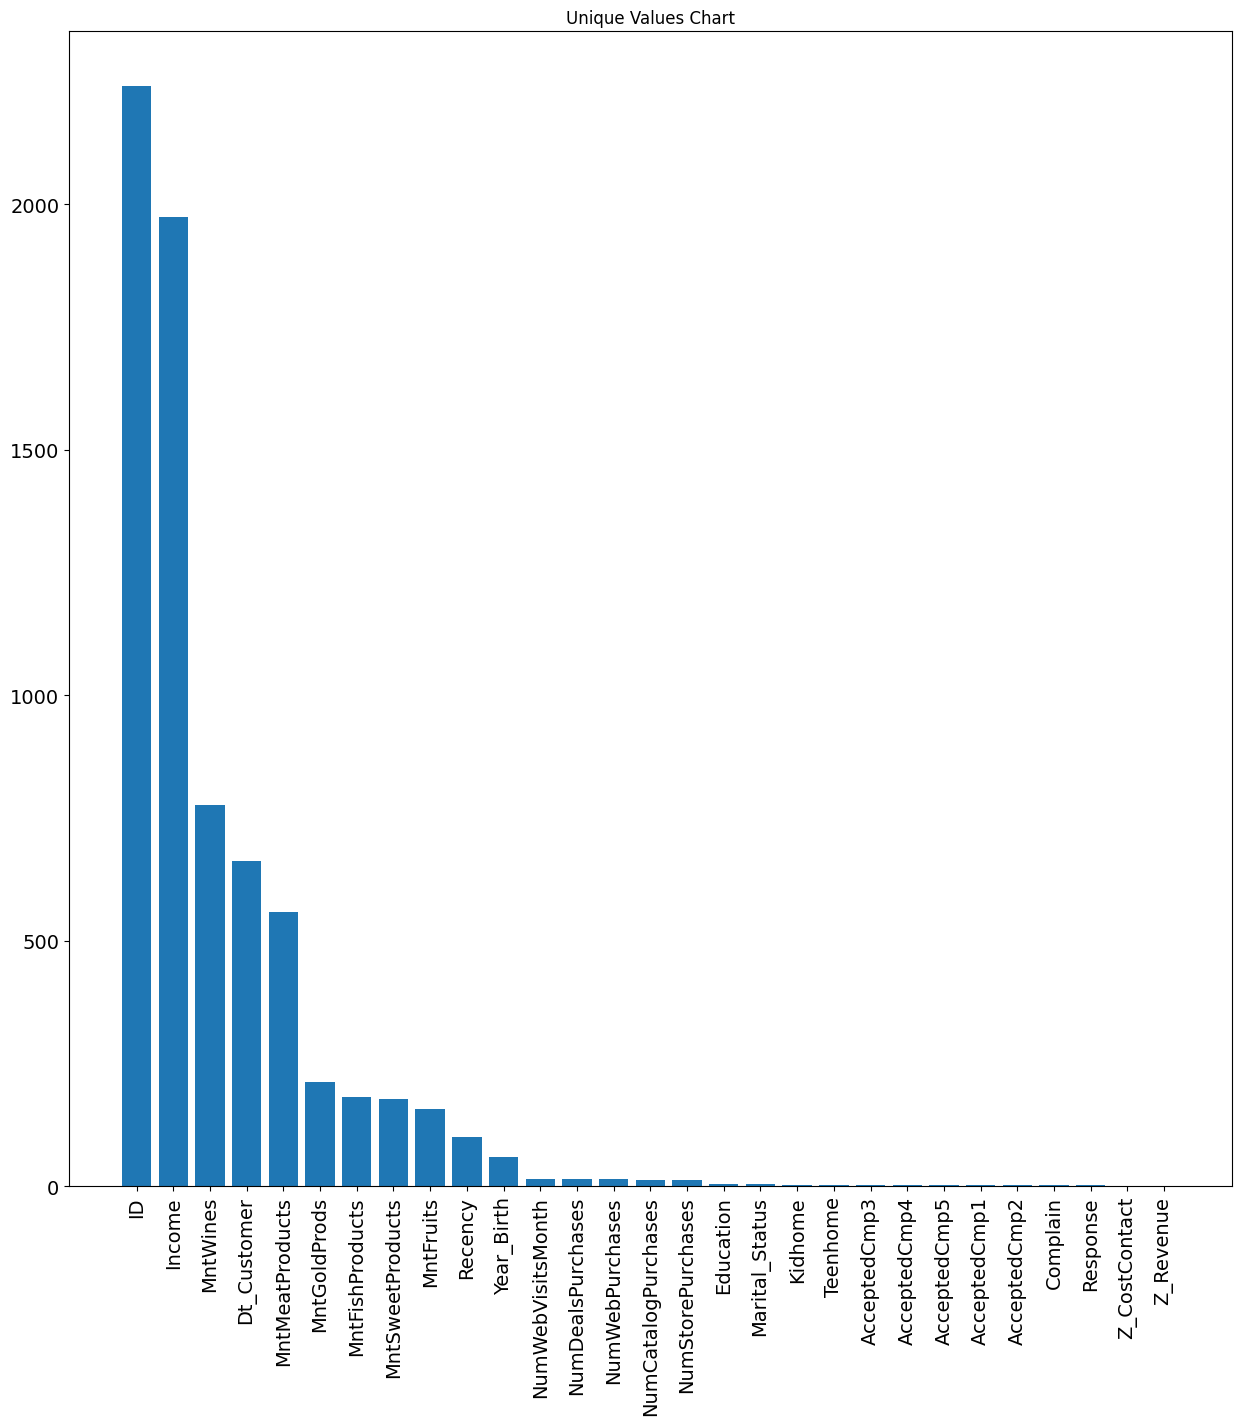

In [339]:
uniquedata = []
for column in column_names:
    unique_values = data[column].unique()
    t = (column, len(unique_values))
    uniquedata.append(t)

#Looks a lot better sorted
sorted_udata = sorted(uniquedata, key=lambda x: x[1], reverse=True)

labels = [t[0] for t in sorted_udata]
values = [t[1] for t in sorted_udata]

fig, ax = plt.subplots(figsize=(15, 15))
ax.bar(labels,values)
ax.set_title('Unique Values Chart')
ax.tick_params(axis='both', which='major', labelsize=14)
plt.xticks(rotation=90)
plt.show()

## 3. Δημιουργία νέων χαρακτηριστικών
1. Δημιουργία ενός χαρακτηριστικού ("Customer_For") που αντιπροσωπεύει τον αριθμό
των ημερών που οι πελάτες άρχισαν να ψωνίζουν στο κατάστημα σε σχέση με την
τελευταία καταγεγραμμένη ημερομηνία (Recency).
2. Εξαγωγή της ηλικίας "Age" ενός πελάτη με βάση το "Year_Birth" που υποδεικνύει το
έτος γέννησης του αντίστοιχου ατόμου.
3. Δημιουργήστε ένα άλλο χαρακτηριστικό "Spent" που υποδεικνύει το συνολικό ποσό
που ξόδεψε ο πελάτης σε όλες τις κατηγορίες σε διάστημα δύο ετών.
4. Δημιουργήστε ένα χαρακτηριστικό "Παιδιά" για να δηλώσετε το σύνολο των παιδιών σε
ένα νοικοκυριό, δηλαδή τα παιδιά και τους εφήβους.
5. Για να αποκτήσετε περαιτέρω σαφήνεια του νοικοκυριού, δημιουργήστε ένα
χαρακτηριστικό με ένδειξη "Family_Size" που δείχνει το συνολικό αριθμό των ατόμων σε
ένα νοικοκυριό
6. Δημιουργήστε ένα χαρακτηριστικό "Is_Parent" που δηλώνει αν ένας πελάτης είναι και
γονιός
7. Δημιουργήστε ένα άλλο χαρακτηριστικό "Living_With" χρησιμοποιώντας το
"Marital_Status" για να εξάγετε την κατάσταση διαβίωσης των ζευγαριών. Συγκεκριμένα
το χαρακτηριστικό αυτό πρέπει να έχει δύο τιμές, "Partner" και "Alone".
8. Δημιουργήστε τη στήλη “Age Group” χρησιμοποιώντας τη στήλη “Age”, η οποία να
ομαδοποιεί τις ηλικίες στις παρακάτω τιμές "21-30", "31-40", "41-50", "51-60", "61-70",
"71-80", ">80".

In [340]:
from datetime import datetime
#1#
data['Customer_For'] = (datetime(2023,4,10) - data['Dt_Customer']).dt.days - data['Recency']
#2#
data['Age'] = 2023 - data['Year_Birth']
#3#   
data['Spent'] = (
    data['MntWines'] + 
    data['MntFruits'] + 
    data['MntMeatProducts'] + 
    data['MntFishProducts'] +
    data['MntSweetProducts'] +
    data['MntGoldProds']
)
#4#
data['Offspring'] = data['Kidhome'] + data['Teenhome']
#5#
replace_dict = {'Single':1,'Divorced' :1, 'Widow':1,'Together' :2, 'Married':2}
data['Int_MS'] = data['Marital_Status'].replace(replace_dict)
data['Family_Size'] = data['Offspring'] + data['Int_MS']
#6#
data['Is_Parent'] = np.where(data['Offspring'] != 0, True, False)
#7#
data['Living_With'] = np.where(data['Int_MS'] == 1, 'Alone','Partner')
#8#
data['Age_Group'] = np.where(data['Age'] <31, '21-30',
                              np.where((data['Age'] >= 31) & (data['Age'] <41), '31-40',
                                       np.where((data['Age'] >= 41) & (data['Age'] <51), '41-50',
                                            np.where((data['Age'] >= 51) & (data['Age'] <61), '51-60',
                                                np.where((data['Age'] >= 61) & (data['Age'] <71), '61-70',       
                                                    np.where((data['Age'] >= 71) & (data['Age'] <81), '71-80',                                         
                                                '>80'))))))

## 4. 
Ελέγξτε αν υπάρχουν ακραίες τιμές στα χαρακτηριστικά και διαγράψτε τις από τα
δεδομένα.

In [341]:
# numerical_cols = data.select_dtypes(include=['float64', 'int64'])
# for col in numerical_cols:
#     q1,q3 = np.percentile(data[col],[25,75])
#     iqr = q3 - q1
#     lower_b = q1 - (1.5 * iqr)
#     upper_b = q3 + (1.5 * iqr)
#     outliers = ((data[col] < lower_b) | (data[col] > upper_b))
#     col_clean_data = data[col][~outliers]
#     clean_data[col] = col_clean_data
# clean_data.info(verbose=True)

numerical_cols = data.select_dtypes(include=['float64', 'int64'])
newdf = data.copy()
for col in numerical_cols:
    newdf['Outlier'] = abs(newdf[col] - newdf[col].mean()) > 1.95*newdf[col].std()

newdf = newdf[newdf['Outlier'] == False]
newdf.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2208 entries, 0 to 2239
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2208 non-null   int64         
 1   Year_Birth           2208 non-null   int64         
 2   Education            2208 non-null   object        
 3   Marital_Status       2208 non-null   object        
 4   Income               2208 non-null   float64       
 5   Kidhome              2208 non-null   int64         
 6   Teenhome             2208 non-null   int64         
 7   Dt_Customer          2208 non-null   datetime64[ns]
 8   Recency              2208 non-null   int64         
 9   MntWines             2208 non-null   int64         
 10  MntFruits            2208 non-null   int64         
 11  MntMeatProducts      2208 non-null   int64         
 12  MntFishProducts      2208 non-null   int64         
 13  MntSweetProducts     2208 non-nul

## 5. 
Στη συνέχεια, εξετάστε τη συσχέτιση μεταξύ των χαρακτηριστικών με ένα heatmap
διάγραμμα. (Εξαιρώντας τα κατηγορικά χαρακτηριστικά σε αυτό το σημείο)

<Axes: >

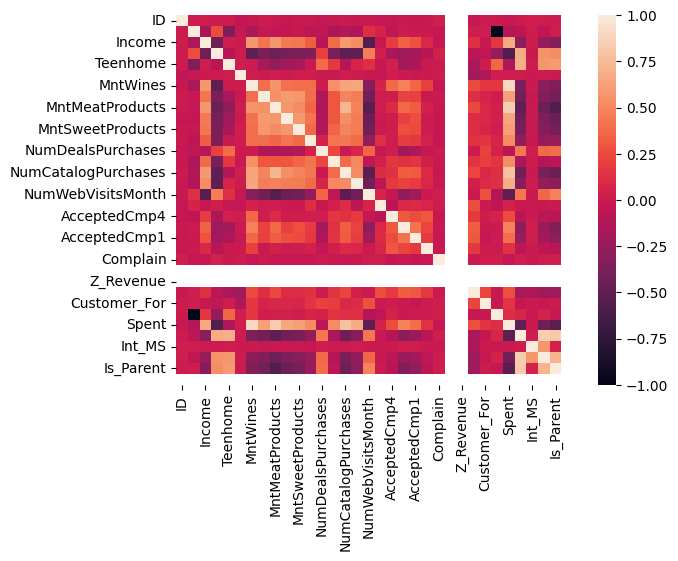

In [342]:
import seaborn as sns

numerical_cols = newdf.select_dtypes(include=['float64', 'int64','bool'])
sns.heatmap(numerical_cols.corr())

## 6. 
Ερωτήματα που θα απαντηθούν με γραφήματα

<BarContainer object of 5 artists>

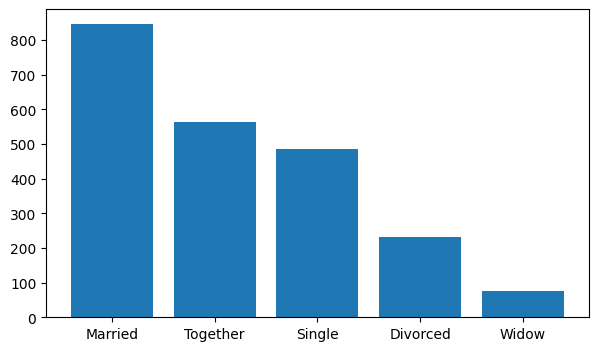

In [343]:
#1# Marrital Status Percentages
category_count = newdf['Marital_Status'].value_counts()
marital_categories = category_count.index
values = category_count.values

fig = plt.figure(figsize=(7, 4))
plt.bar(marital_categories,values)

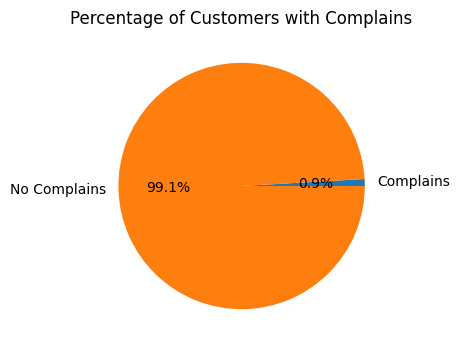

In [344]:
#2# Percentage of Complainers
number_of_customers = len(newdf)
number_of_complains = sum(newdf['Complain'] >= 1)
rest  = number_of_customers - number_of_complains

fig = plt.figure(figsize=(7, 4))
plt.pie([number_of_complains, rest], labels=['Complains', 'No Complains'], autopct='%1.1f%%')
plt.title('Percentage of Customers with Complains')
plt.show()

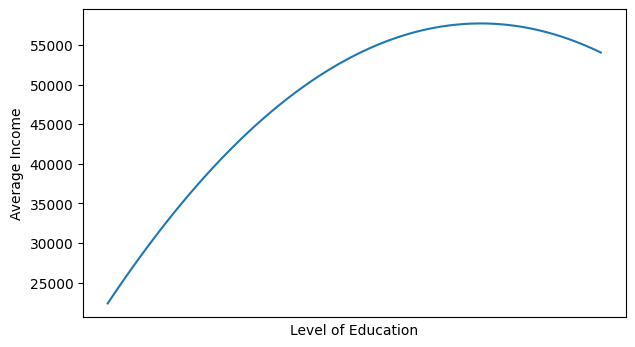

In [345]:
#7# Relation between Income and Education level

#I'm giving numerical values at the levels of education cause I want to interpolate
#I actually hate discrete graphs, so disgusting
newdf['Education'].unique() 
replace_dict = {'Basic':0,'Graduation':1, '2n Cycle':2,'Master' :2, 'PhD':3}
newdf['Num_Ed'] = newdf['Education'].replace(replace_dict)
avg_inc = newdf.groupby('Num_Ed')['Income'].mean()

#Interpolation stuff
coeffs = np.polyfit(avg_inc.index, avg_inc, 2)
polynomial = np.poly1d(coeffs)
x = np.linspace(avg_inc.index[0], avg_inc.index[-1], 100)

fig = plt.figure(figsize=(7, 4))
plt.xticks([])
plt.plot(x, polynomial(x))
plt.xlabel('Level of Education')
plt.ylabel('Average Income')
plt.show()

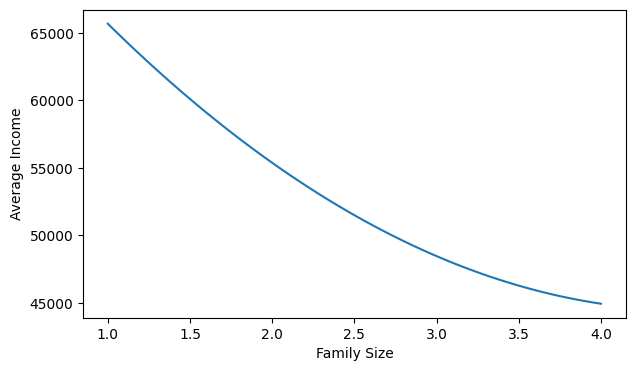

In [346]:
#8# Income and Family size
avg_inc = newdf.groupby('Family_Size')['Income'].mean()
#Interpolation stuff
coeffs = np.polyfit(avg_inc.index, avg_inc, 2)
polynomial = np.poly1d(coeffs)
x = np.linspace(avg_inc.index[0], avg_inc.index[-1], 100)

fig = plt.figure(figsize=(7, 4))
plt.plot(x, polynomial(x))
plt.xlabel('Family Size')
plt.ylabel('Average Income')
plt.show()

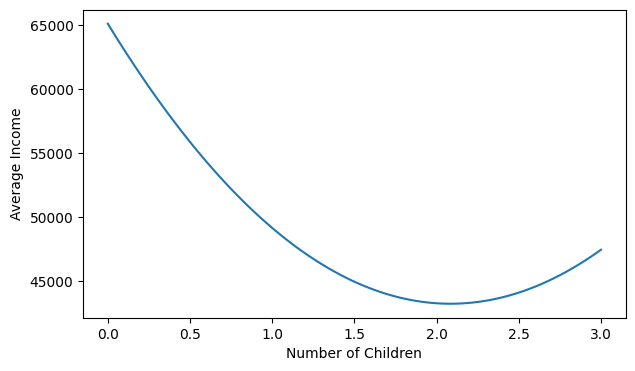

In [347]:
#9# Income and number of children
avg_inc = newdf.groupby('Offspring')['Income'].mean()
#Interpolation stuff
coeffs = np.polyfit(avg_inc.index, avg_inc, 2)
polynomial = np.poly1d(coeffs)
x = np.linspace(avg_inc.index[0], avg_inc.index[-1], 100)

fig = plt.figure(figsize=(7, 4))
plt.plot(x, polynomial(x))
plt.xlabel('Number of Children')
plt.ylabel('Average Income')
plt.show()

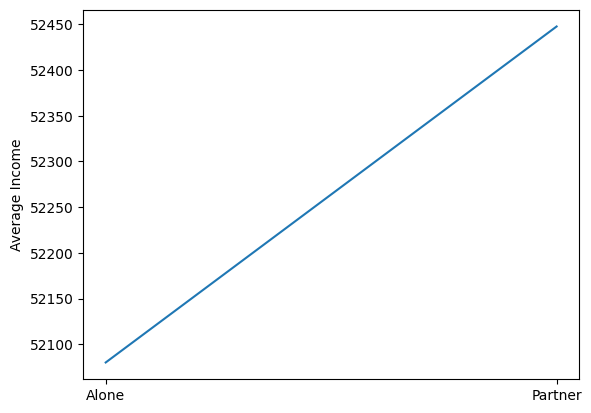

In [348]:
#10# Alone vs Partener
avg_inc = newdf.groupby('Living_With')['Income'].mean()

plt.ylabel('Average Income')
plt.plot(avg_inc)

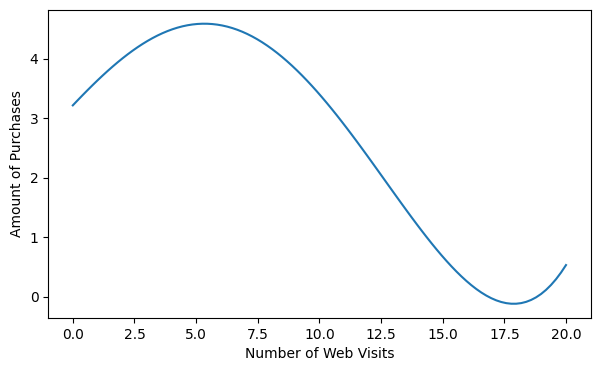

In [349]:
#12# Number of web purchases and web visits
avg_buys = newdf.groupby('NumWebVisitsMonth')['NumWebPurchases'].mean()

#plt.plot(avg_buys) #Yeah I tested that cause I was sceptic of the results 

#Interpolation stuff
coeffs = np.polyfit(avg_buys.index, avg_buys, 4)
polynomial = np.poly1d(coeffs)
x = np.linspace(avg_buys.index[0], avg_buys.index[-1], 100)

fig = plt.figure(figsize=(7, 4))
plt.plot(x, polynomial(x))
plt.xlabel('Number of Web Visits')
plt.ylabel('Amount of Purchases')
plt.show()


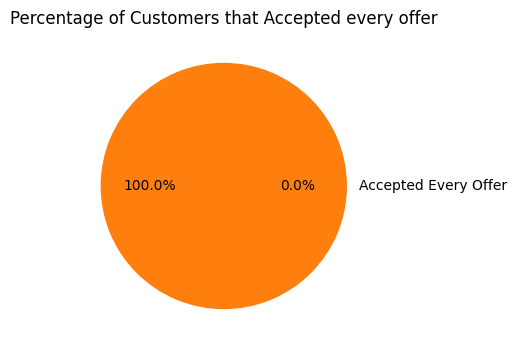

In [350]:
#13# Percentage of people that accept all offers
number_of_accpt = sum(
    (newdf['AcceptedCmp1'] == 1) & (newdf['AcceptedCmp2'] == True)
    & (newdf['AcceptedCmp3'] == True) & (newdf['AcceptedCmp4'] == True)
    & (newdf['AcceptedCmp5'] == True ) & (newdf['Response'] == True)
    )
rest  = number_of_customers - number_of_accpt 
fig = plt.figure(figsize=(7, 4))
plt.pie([number_of_accpt, rest], labels=['Accepted Every Offer', ''], autopct='%1.1f%%')
plt.title('Percentage of Customers that Accepted every offer')
plt.show() # 0% lol

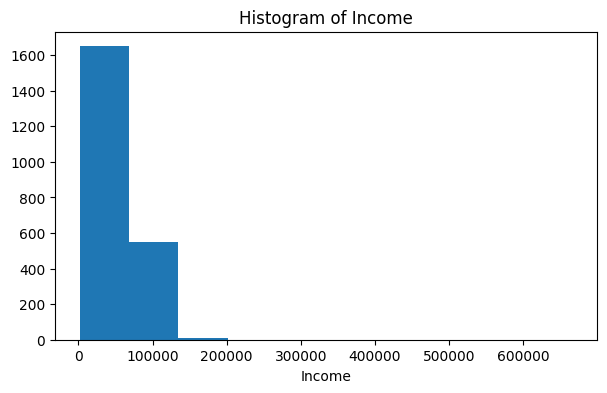

In [351]:
#15# Histogram of Income
fig, ax = plt.subplots(figsize=(7, 4))
plt.hist(newdf['Income'])
plt.xlabel('Income')
plt.title('Histogram of Income')
plt.show()

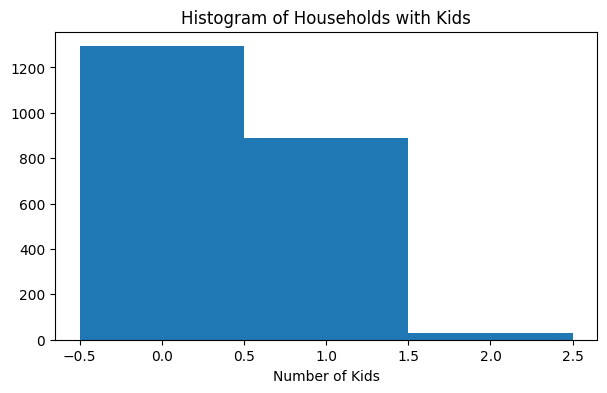

In [352]:
#16# Histogram of households with kids
unique_values = newdf['Kidhome'].unique()
counts = newdf['Kidhome'].value_counts(sort=False)

fig, ax = plt.subplots(figsize=(7, 4))
ax.bar(unique_values, counts, width=1, align='center')
plt.xlabel('Number of Kids')
plt.title('Histogram of Households with Kids')
plt.show()


## 7. Principal component analysis (PCA)
Σε αυτό το πρόβλημα, υπάρχουν πολλοί
παράγοντες βάσει των οποίων γίνεται μία ταξινόμηση. Αυτοί οι παράγοντες είναι βασικά
χαρακτηριστικά ή γνωρίσματα. Όσο μεγαλύτερος είναι ο αριθμός των χαρακτηριστικών, τόσο πιο
δύσκολη είναι η εργασία. Πολλά από αυτά τα χαρακτηριστικά είναι συσχετισμένα και, ως εκ
τούτου, περιττά. Αυτός είναι ο λόγος για τον οποίο θα πραγματοποιήσετε μείωση της
διάστασης στα επιλεγμένα χαρακτηριστικά. Η μείωση της διάστασης είναι η διαδικασία μείωσης
του αριθμού των υπό εξέταση τυχαίων μεταβλητών, και έχει ώς αποτέλεσμα την απόκτηση ενός
συνόλου κύριων μεταβλητών.
Οι μεταβλητές στο σύνολο δεδομένων που αφορούν κατηγορίες και όχι αριθμητικές τιμές, μετά
και τις προσθήκες χαρακτηριστικών που έγιναν στα προηγούμενα ερωτήματα είναι οι παρακάτω
```['Education','Marital_Status','Living_With']```. Για αυτές τις μεταβλητές θα χρησιμοποιήσετε τον
```LabelEncoder()``` ώστε να μετατραπούν σε αριθμητικά δεδομένα (η διαδικασία ονομάζεται one
hot encoding). <br>
Στη συνέχεια δημιουργήστε ένα αντίγραφο του dataframe το οποίο θα περιέχει όλες τις
αριθμητικές στήλες και διαγράψτε τις στήλες που σχετίζονται με προσφορές και προωθητικές
ενέργειες, δηλαδή τις ```['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
'AcceptedCmp2', 'Complain', 'Response']```.
Έτσι, τα δεδομένα που έχουν προκύψει περιέχουν χαρακτηριστικά διαφόρων διαστάσεων και
διακυμάνσεων. Οι διαφορετικές διακυμάνσεις των χαρακτηριστικών των δεδομένων επηρεάζουν
αρνητικά τη μοντελοποίηση ενός συνόλου δεδομένων. Η λύση είναι να γίνει αυτό που
ονομάζεται Standardization έτσι ώστε κάθε στήλη/χαρακτηριστικό/μεταβλητή να έχει ```μ = 0``` και ```σ
= 1```.
Τέλος χρησιμοποιήστε την μέθοδο συμπίεσης Principal Component Analysis (PCA) για να
μειώσετε τις διαστάσεις σε ```n_components=3```. Σχεδιάστε την (τρισδιάστατη) προβολή του
αποτελέσματος.


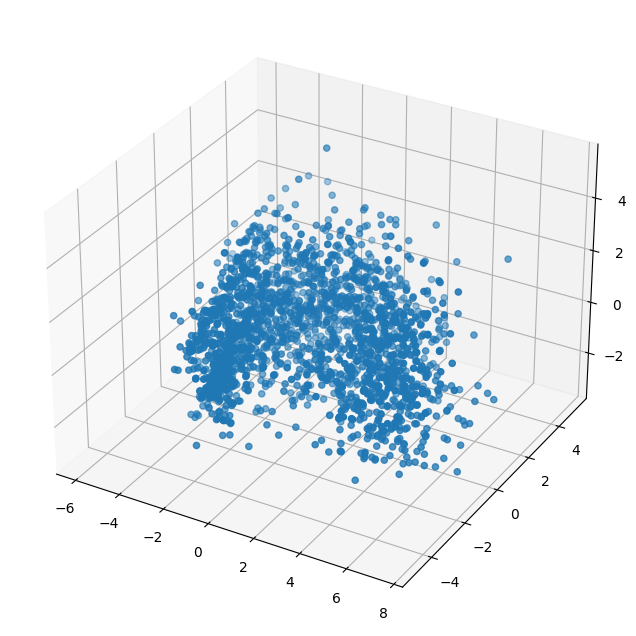

In [353]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

le = preprocessing.LabelEncoder()

newdf['Education'] = le.fit_transform(newdf['Education'])
newdf['Marital_Status'] = le.fit_transform(newdf['Marital_Status'])
newdf['Living_With'] = le.fit_transform(newdf['Living_With'])

df = newdf.copy()
df.drop(['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response','Age_Group','Dt_Customer','Outlier'],axis=1,inplace=True)
df['Is_Parent'] = df['Is_Parent'].astype(int)

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

pca = PCA(n_components=3)
pca.fit(df_scaled)
df_pca = pca.transform(df_scaled)

fig =  plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca[:,0],df_pca[:,1],df_pca[:,2])
plt.show()

## 8. Υλοποίηση Συσταδοποίησης (Clustering)
**Βήματα:**
* Μέθοδος ELBOW για τον προσδιορισμό του αριθμού των συστάδων που πρέπει να
σχηματιστούν
* Συσταδοποίηση μέσω συσσωρευτικής συσταδοποίησης (Agglomerative και K-Means)
* Εμφάνιση των σχηματιζόμενων συστάδων μέσω διαγράμματος (πχ scatter plot).



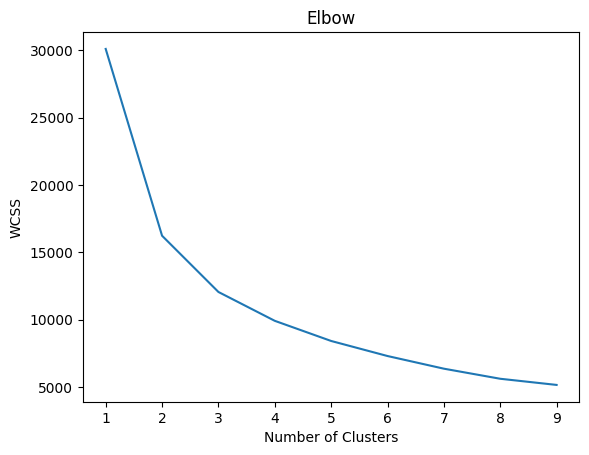

In [354]:
from sklearn.cluster import KMeans

def elbow(data):
    wcss = []
    for i in range(1,10):
        kmeans = KMeans(n_clusters=i, n_init=10)
        kmeans.fit(data)
        wcss_iter = kmeans.inertia_
        wcss.append(wcss_iter)
    return wcss

wcss_values = elbow(df_pca)
numberOClusters = range(1,10)

plt.plot(numberOClusters,wcss_values)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow')
plt.show()

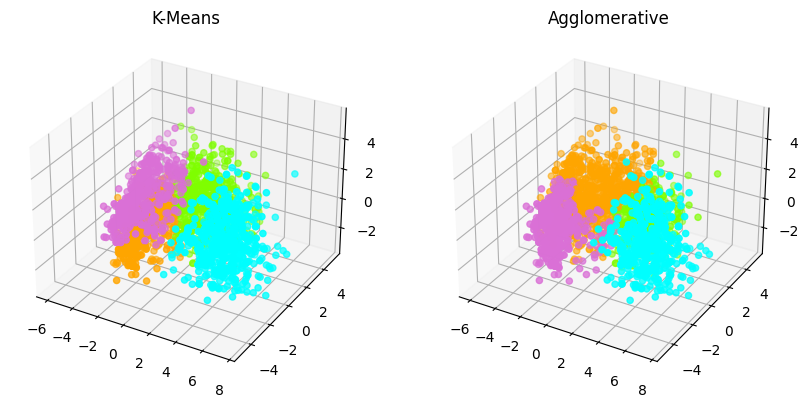

In [355]:
from sklearn.cluster import AgglomerativeClustering

colours = {0: 'orange', 1: 'aqua', 2: 'orchid',3: 'chartreuse', 
           4:'brown', 5:'gold', 6:'dodgerblue', 7:'blueviolet'}

kmeans = KMeans(n_clusters=4, n_init=10)
kmeans.fit(df_pca)
labels_k = kmeans.predict(df_pca)
cluster_colours_k = [colours[label] for label in labels_k]

agglomerative = AgglomerativeClustering(n_clusters=4)
labels_ag = agglomerative.fit_predict(df_pca)
cluster_colours_ag = [colours[label] for label in labels_ag]

fig = plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(df_pca[:,0],df_pca[:,1],df_pca[:,2],c=cluster_colours_k)
ax1.set_title('K-Means')

ax2 = fig.add_subplot(122,projection="3d")
ax2.scatter(df_pca[:,0],df_pca[:,1],df_pca[:,2],c=cluster_colours_ag)
ax2.set_title('Agglomerative')

plt.show()

## 9. Προφίλ των πελατών
Προσπαθήστε μέσα από διαγράμματα να σκιαγραφήσετε το
προφίλ των συστάδων που σχηματίζονται ώστε να καταλήξετε
σε ένα συμπέρασμα σχετικά με το ποιος είναι ο “σημαντικός”
πελάτης και ποιος χρειάζεται περισσότερη προσοχή από την
ομάδα μάρκετινγκ του καταστήματος.
Για να πετύχετε αυτό σχεδιάστε μερικά από τα χαρακτηριστικά
που είναι ενδεικτικά των προσωπικών χαρακτηριστικών του πελάτη υπό το πρίσμα της
συστάδας στην οποία βρίσκονται (πχ Ηλικία, Is_Parent, Family_Size κτλ). Τέλος για κάθε ένα
από τα clusters συγκεντρώστε τα βασικά του χαρακτηριστικά. Πχ: <br>

|   Cluster 0:  |   Cluster 1:   |
|--------------|--------------|
|  Ξοδεύουν τα λιγότερα  | Ξοδεύουν περισσότερα |
|   Έχουν το μικρότερο εισόδημα |  Έχουν μεγαλύτερο εισόδημα |
|   Έχουν εφήβους στο σπίτι |  Οι περισσότεροι δεν ειναι γονείς|
|   Είναι πιο μεγάλοι σε ηλικία | Συμμετείχε ενεργά και στις 6 προωθητικές ενέργειες |